In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

path = "/Users/cici/Desktop/LMU/WS_2020_21/Machine_Learning/data"
os.chdir(path)
data_exports = pd.read_excel("ChinaExportsToGermany.xls")
data_imports = pd.read_excel("ChinaImportsFromGermany.xls")
data_CHN_bot = pd.read_excel("CHN_DEU_BOT.xls")
data_bot = pd.read_excel("CHN_BOT.xls")

In [2]:
data_exports_t = data_exports.T
data_exports_t.drop(["Product label"], inplace = True) 

In [3]:
header_row = 0
data_exports_t.columns = data_exports_t.iloc[header_row]

In [4]:
data_exports_t.insert(0, 'year', range(2000, 2000 + len(data_exports_t)))
data_exports_t.head()

Product code,year,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Product code,2000,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Value in 2001,2001,9751100,0,0,39,127071,78,13862,0,8,...,57,1478,854,57604,171403,10886,2809,5080,12768,0
Value in 2002,2002,11371850,0,0,0,122699,23,8953,0,2,...,100,1559,713,62795,181704,13821,2477,6095,11683,240
Value in 2003,2003,17442112,0,0,0,175392,0,13630,11,5,...,180,2844,537,85845,267730,19337,4733,7587,10509,379
Value in 2004,2004,23755732,0,0,0,222990,31,17369,68,20,...,41,5658,747,138200,306338,22148,7223,10121,19806,341


In [5]:
data_exports_final = data_exports_t[(data_exports_t["year"] >= 2001) & (data_exports_t["year"] <= 2014)]
data_exports_final.head()

Product code,year,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Value in 2001,2001,9751100,0,0,39,127071,78,13862,0,8,...,57,1478,854,57604,171403,10886,2809,5080,12768,0
Value in 2002,2002,11371850,0,0,0,122699,23,8953,0,2,...,100,1559,713,62795,181704,13821,2477,6095,11683,240
Value in 2003,2003,17442112,0,0,0,175392,0,13630,11,5,...,180,2844,537,85845,267730,19337,4733,7587,10509,379
Value in 2004,2004,23755732,0,0,0,222990,31,17369,68,20,...,41,5658,747,138200,306338,22148,7223,10121,19806,341
Value in 2005,2005,32527131,0,0,0,264607,69,25125,96,39,...,107,7050,1090,188801,397265,30986,9019,14271,23527,928


In [6]:
data_imports_t = data_imports.T
data_imports_t.drop(["Product label"], inplace = True) 

In [7]:
header_row = 0
data_imports_t.columns = data_imports_t.iloc[header_row]

In [8]:
data_imports_t.insert(0, 'year', range(2000, 2000 + len(data_imports_t)))
data_imports_t.head()

Product code,year,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Product code,2000,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Value in 2001,2001,13772190,458,0,0,0,896,1014,3,1,...,12,16,5,7652,5197,1,70,48,93,38
Value in 2002,2002,16416415,730,0,0,0,58,2967,7,0,...,0,19,14,12378,11637,2,162,15,67,6
Value in 2003,2003,24291889,303,0,0,0,34,3718,0,5,...,0,20,19,19924,12604,6,287,15,59,10
Value in 2004,2004,30356021,2483,0,42,183,429,5178,0,2,...,31,203,34,21495,13009,1,192,5,125,0


In [9]:
data_imports_final = data_imports_t[(data_imports_t["year"] >= 2001) & (data_imports_t["year"] <= 2014)]
data_imports_final.head()

Product code,year,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Value in 2001,2001,13772190,458,0,0,0,896,1014,3,1,...,12,16,5,7652,5197,1,70,48,93,38
Value in 2002,2002,16416415,730,0,0,0,58,2967,7,0,...,0,19,14,12378,11637,2,162,15,67,6
Value in 2003,2003,24291889,303,0,0,0,34,3718,0,5,...,0,20,19,19924,12604,6,287,15,59,10
Value in 2004,2004,30356021,2483,0,42,183,429,5178,0,2,...,31,203,34,21495,13009,1,192,5,125,0
Value in 2005,2005,30722928,1566,0,42,113,925,9863,0,0,...,53,245,12,27370,14133,27,451,33,153,3


In [10]:
my_data = [data_exports_final, data_imports_final]
my_data = pd.concat(my_data)
my_data

Product code,year,TOTAL,105,201,203,304,306,505,508,601,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
Value in 2001,2001,9751100,0,0,39,127071,78,13862,0,8,...,57,1478,854,57604,171403,10886,2809,5080,12768,0
Value in 2002,2002,11371850,0,0,0,122699,23,8953,0,2,...,100,1559,713,62795,181704,13821,2477,6095,11683,240
Value in 2003,2003,17442112,0,0,0,175392,0,13630,11,5,...,180,2844,537,85845,267730,19337,4733,7587,10509,379
Value in 2004,2004,23755732,0,0,0,222990,31,17369,68,20,...,41,5658,747,138200,306338,22148,7223,10121,19806,341
Value in 2005,2005,32527131,0,0,0,264607,69,25125,96,39,...,107,7050,1090,188801,397265,30986,9019,14271,23527,928
Value in 2006,2006,40314598,0,0,0,339006,1,21745,88,27,...,45,7636,1684,233527,424972,29439,11043,14350,23629,1150
Value in 2007,2007,48744144,0,0,0,355573,187,20309,69,296,...,0,15136,1784,329709,563406,36973,14002,19588,29202,1366
Value in 2008,2008,59208951,0,0,0,473873,97,21699,18,258,...,0,15788,3988,410460,676086,46462,14239,23823,36107,331
Value in 2009,2009,49919564,0,0,0,463427,3836,19277,18,2,...,0,16534,2301,458775,634445,34479,11298,21009,35990,1814
Value in 2010,2010,68047133,0,0,0,478522,3226,22961,21,3,...,0,17480,3442,607106,838443,44013,14754,27184,43884,2597


In [101]:
#data_imports_final1 = data_imports_final.iloc[:, 1:]
#data_imports_final1.head()

Product code,TOTAL,105,201,203,304,306,505,508,601,706,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
ImValue in 2001,13772190,458,0,0,0,896,1014,3,1,0,...,12,16,5,7652,5197,1,70,48,93,38
ImValue in 2002,16416415,730,0,0,0,58,2967,7,0,0,...,0,19,14,12378,11637,2,162,15,67,6
ImValue in 2003,24291889,303,0,0,0,34,3718,0,5,0,...,0,20,19,19924,12604,6,287,15,59,10
ImValue in 2004,30356021,2483,0,42,183,429,5178,0,2,0,...,31,203,34,21495,13009,1,192,5,125,0
ImValue in 2005,30722928,1566,0,42,113,925,9863,0,0,0,...,53,245,12,27370,14133,27,451,33,153,3


In [43]:
#data_ExIm_t = data_ExIm.T
#data_ExIm_t.drop(["Product label"], inplace = True) 
#data_ExIm_t

,0,1,2,3,4,5,6,7,8,9,...,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256
Product code,TOTAL,105,201,203,304,306,505,508,601,706,...,9203,9205,9208,9403,9405,9507,9609,9615,9617,9705
ExValue in 2001,9751100,0,0,39,127071,78,13862,0,8,0,...,57,1478,854,57604,171403,10886,2809,5080,12768,0
ExValue in 2002,11371850,0,0,0,122699,23,8953,0,2,14,...,100,1559,713,62795,181704,13821,2477,6095,11683,240
ExValue in 2003,17442112,0,0,0,175392,0,13630,11,5,24,...,180,2844,537,85845,267730,19337,4733,7587,10509,379
ExValue in 2004,23755732,0,0,0,222990,31,17369,68,20,13,...,41,5658,747,138200,306338,22148,7223,10121,19806,341
ExValue in 2005,32527131,0,0,0,264607,69,25125,96,39,0,...,107,7050,1090,188801,397265,30986,9019,14271,23527,928
ExValue in 2006,40314598,0,0,0,339006,1,21745,88,27,0,...,45,7636,1684,233527,424972,29439,11043,14350,23629,1150
ExValue in 2007,48744144,0,0,0,355573,187,20309,69,296,7,...,0,15136,1784,329709,563406,36973,14002,19588,29202,1366
ExValue in 2008,59208951,0,0,0,473873,97,21699,18,258,0,...,0,15788,3988,410460,676086,46462,14239,23823,36107,331
ExValue in 2009,49919564,0,0,0,463427,3836,19277,18,2,0,...,0,16534,2301,458775,634445,34479,11298,21009,35990,1814


In [2]:
data_bot.head()

,Code,Product label,"Balance in value in 2001,US Dollar thousand","Balance in value in 2002,US Dollar thousand","Balance in value in 2003,US Dollar thousand","Balance in value in 2004,US Dollar thousand","Balance in value in 2005,US Dollar thousand","Balance in value in 2006,US Dollar thousand","Balance in value in 2007,US Dollar thousand","Balance in value in 2008,US Dollar thousand",...,"Balance in value in 2012,US Dollar thousand","Balance in value in 2013,US Dollar thousand","Balance in value in 2014,US Dollar thousand","Balance in value in 2015,US Dollar thousand","Balance in value in 2016,US Dollar thousand","Balance in value in 2017,US Dollar thousand","Balance in value in 2018,US Dollar thousand","Balance in value in 2019,US Dollar thousand","value in 2019,US Dollar thousand","Imported value in 2019,US Dollar thousand"
0,'TOTAL,All products,22545328,30425866,25467971,32096833,102000648,177474733,263944220,298130900,...,230583000,259015000,383058071,600185106,530284715,430839082,359242930,429619611,2498569866,2068950255
1,'8517,"Telephone sets, incl. telephones for cellular ...",-1747566,837637,2108449,4131074,6164432,8167717,59945602,70986022,...,114057872,127997186,151438071,164346650,155691732,171626465,191462681,181505424,224069819,42564395
2,'8471,Automatic data-processing machines and units t...,8112845,13398931,29606103,45455182,58276353,73092819,73503101,82805132,...,128551205,132645830,134700772,111175447,99142251,116160103,122932855,117905153,148463426,30558273
3,'9405,"Lamps and lighting fittings, incl. searchlight...",2412295,3055702,3691109,4406859,5271954,6192140,7563919,8982132,...,19047607,24210683,30604836,35231977,30627511,28513865,30097055,32640029,33197800,557771
4,'9503,"Tricycles, scooters, pedal cars and similar wh...",4560468,4983904,5359836,5665551,5788599,6108652,8337384,8477737,...,11176685,12062841,13775490,15173430,17999584,23702709,24819754,30587170,31342495,755325


In [3]:
data_bot_t = data_bot.T
data_bot_t.drop(["Product label"], inplace = True) 

In [4]:
header_row = 0
data_bot_t.columns = data_bot_t.iloc[header_row]

In [5]:
data_bot_t.insert(0, 'year', range(2000, 2000 + len(data_bot_t)))
data_bot_t.head()

Code,year,'TOTAL,'8517,'8471,'9405,'9503,'8528,'9403,'9401,'4202,...,'7403,'8486,'2603,'1201,'8703,'7108,'2711,'2601,'8542,'2709
Code,2000,'TOTAL,'8517,'8471,'9405,'9503,'8528,'9403,'9401,'4202,...,'7403,'8486,'2603,'1201,'8703,'7108,'2711,'2601,'8542,'2709
"Balance in value in 2001,US Dollar thousand",2001,22545328,-1747566,8112845,2412295,4560468,1550669,2355039,1374199,3838602,...,-1338042,0,-897273,-2732396,-1229449,0,-1160301,-2502670,-14371995,-10277929
"Balance in value in 2002,US Dollar thousand",2002,30425866,837637,13398931,3055702,4983904,2359282,3269577,1805753,4315342,...,-1871975,0,-808364,-2406161,-2561029,0,-1330319,-2768978,-22058946,-11461138
"Balance in value in 2003,US Dollar thousand",2003,25467971,2108449,29606103,3691109,5359836,3385805,4362051,2417870,4994699,...,-2467089,0,-1288461,-5329862,-4330360,0,-1820671,-4855993,-35245709,-18120800
"Balance in value in 2004,US Dollar thousand",2004,32096833,4131074,45455182,4406859,5665551,5337445,5872566,3637138,6125067,...,-3142659,0,-2227606,-6834235,-4284794,0,-2213650,-12698783,-50483203,-32586989


In [6]:
data_bot_final = data_bot_t[(data_bot_t["year"] >= 2001) & (data_bot_t["year"] <= 2014)]
data_bot_final.head()

Code,year,'TOTAL,'8517,'8471,'9405,'9503,'8528,'9403,'9401,'4202,...,'7403,'8486,'2603,'1201,'8703,'7108,'2711,'2601,'8542,'2709
"Balance in value in 2001,US Dollar thousand",2001,22545328,-1747566,8112845,2412295,4560468,1550669,2355039,1374199,3838602,...,-1338042,0,-897273,-2732396,-1229449,0,-1160301,-2502670,-14371995,-10277929
"Balance in value in 2002,US Dollar thousand",2002,30425866,837637,13398931,3055702,4983904,2359282,3269577,1805753,4315342,...,-1871975,0,-808364,-2406161,-2561029,0,-1330319,-2768978,-22058946,-11461138
"Balance in value in 2003,US Dollar thousand",2003,25467971,2108449,29606103,3691109,5359836,3385805,4362051,2417870,4994699,...,-2467089,0,-1288461,-5329862,-4330360,0,-1820671,-4855993,-35245709,-18120800
"Balance in value in 2004,US Dollar thousand",2004,32096833,4131074,45455182,4406859,5665551,5337445,5872566,3637138,6125067,...,-3142659,0,-2227606,-6834235,-4284794,0,-2213650,-12698783,-50483203,-32586989
"Balance in value in 2005,US Dollar thousand",2005,102000648,6164432,58276353,5271954,5788599,8295246,7726209,5175126,7147159,...,-3948790,0,-3720612,-7608734,-3840527,0,-2603944,-18379149,-67600664,-45026751


In [7]:
gravity = pd.read_stata('TRADHIST_v4.dta.dta')
gravity

,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,SOURCE_GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
0,,ADEN,1950,NaN,NaN,,NaN,,NaN,,...,,ASIA,,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
1,,ADEN,1951,NaN,NaN,,NaN,,NaN,,...,,ASIA,,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
2,,ADEN,1952,NaN,NaN,,NaN,,NaN,,...,,ASIA,,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
3,,ADEN,1953,NaN,NaN,,NaN,,NaN,,...,,ASIA,,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
4,,ADEN,1954,NaN,NaN,,NaN,,NaN,,...,,ASIA,,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,ZWE,ZMB,2010,46558256.0,NaN,DOTS_IP,6.097825e+09,WDI,1.311544e+10,WDI,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502423,ZWE,ZMB,2011,55171376.0,NaN,DOTS_IP,6.838230e+09,WDI,1.464204e+10,WDI,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502424,ZWE,ZMB,2012,58787336.0,NaN,DOTS_IP,7.845171e+09,WDI,1.614463e+10,WDI,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502425,ZWE,ZMB,2013,77869776.0,NaN,DOTS_IP,8.629172e+09,WDI,1.793963e+10,WDI,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0


In [24]:
gravity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502427 entries, 0 to 2502426
Data columns (total 63 columns):
 #   Column            Dtype  
---  ------            -----  
 0   iso_o             object 
 1   iso_d             object 
 2   year              int16  
 3   FLOW              float32
 4   FLOW_0            float64
 5   SOURCE_TF         object 
 6   GDP_o             float32
 7   SOURCE_GDP_o      object 
 8   GDP_d             float32
 9   SOURCE_GDP_d      object 
 10  SH_PRIM_o         float32
 11  SOURCE_SH_PRIM_o  object 
 12  SH_SECD_o         float32
 13  SOURCE_SH_SECD_o  object 
 14  SH_PRIM_d         float32
 15  SOURCE_SH_PRIM_d  object 
 16  SH_SECD_d         float32
 17  SOURCE_SH_SECD_d  object 
 18  POP_o             float32
 19  POP_d             float32
 20  SOURCE_POP_o      object 
 21  SOURCE_POP_d      object 
 22  IPTOT_o           float32
 23  SOURCE_IPTOT_o    object 
 24  IPTOT_d           float32
 25  SOURCE_IPTOT_d    object 
 26  XPTOT_o       

In [8]:
my_gravity = gravity[(gravity["iso_o"] == 'CHN')]
my_gravity = my_gravity[['iso_o', 'iso_d', 'year', 'FLOW', 'GDP_o', 'GDP_d', 'SH_PRIM_o', 'SH_SECD_o', 'SH_PRIM_d', 'SH_SECD_d', 'POP_o', 'POP_d', 'IPTOT_o', 'IPTOT_d', 'XPTOT_o', 'XPTOT_d', 'BITARIFF', 'TARIFF_o', 'TARIFF_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'Evercol', 'XCH_RATE_o', 'XCH_RATE_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418144,CHN,ABW,1989,7.572433e+05,2.114399e+11,NaN,24.739180,42.367893,NaN,NaN,...,1.0,0.0,0.162325,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418145,CHN,ABW,1990,8.098823e+05,2.021655e+11,NaN,26.722700,40.896332,NaN,NaN,...,1.0,0.0,0.117740,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418146,CHN,ABW,1991,1.187329e+06,2.162905e+11,NaN,24.153822,41.359184,NaN,NaN,...,1.0,0.0,0.106514,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418147,CHN,ABW,1992,2.191920e+06,2.421164e+11,NaN,21.427279,43.003811,NaN,NaN,...,1.0,0.0,0.103321,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418148,CHN,ABW,1993,1.038807e+06,2.952897e+11,NaN,19.387575,46.089577,NaN,NaN,...,1.0,0.0,0.115717,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,NaN,0.0,0.0,0.0,0.0,1.0,1.0


In [9]:
my_gravity = my_gravity[my_gravity['GDP_o'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418144,CHN,ABW,1989,7.572433e+05,2.114399e+11,NaN,24.739180,42.367893,NaN,NaN,...,1.0,0.0,0.162325,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418145,CHN,ABW,1990,8.098823e+05,2.021655e+11,NaN,26.722700,40.896332,NaN,NaN,...,1.0,0.0,0.117740,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418146,CHN,ABW,1991,1.187329e+06,2.162905e+11,NaN,24.153822,41.359184,NaN,NaN,...,1.0,0.0,0.106514,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418147,CHN,ABW,1992,2.191920e+06,2.421164e+11,NaN,21.427279,43.003811,NaN,NaN,...,1.0,0.0,0.103321,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418148,CHN,ABW,1993,1.038807e+06,2.952897e+11,NaN,19.387575,46.089577,NaN,NaN,...,1.0,0.0,0.115717,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,NaN,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
my_gravity = my_gravity[my_gravity['GDP_d'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418149,CHN,ABW,1994,8.782059e+05,3.673966e+11,8.691674e+08,19.544941,46.086845,0.503990,15.287694,...,1.0,0.0,0.075815,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418150,CHN,ABW,1995,3.590515e+05,4.638653e+11,8.368666e+08,19.663078,46.681324,0.507614,15.143824,...,1.0,0.0,0.075875,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418151,CHN,ABW,1996,6.521619e+05,5.517650e+11,8.844504e+08,19.389904,47.037472,0.485830,14.939271,...,1.0,0.0,0.077092,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418152,CHN,ABW,1997,8.601182e+05,5.852783e+11,9.357053e+08,17.958818,47.027744,0.437637,17.140774,...,1.0,0.0,0.073685,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418153,CHN,ABW,1998,6.653658e+05,6.190868e+11,1.005586e+09,17.221209,45.719967,0.402549,17.510902,...,1.0,0.0,0.072935,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,NaN,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
my_gravity = my_gravity[my_gravity['FLOW'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418149,CHN,ABW,1994,8.782059e+05,3.673966e+11,8.691674e+08,19.544941,46.086845,0.503990,15.287694,...,1.0,0.0,0.075815,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418150,CHN,ABW,1995,3.590515e+05,4.638653e+11,8.368666e+08,19.663078,46.681324,0.507614,15.143824,...,1.0,0.0,0.075875,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418151,CHN,ABW,1996,6.521619e+05,5.517650e+11,8.844504e+08,19.389904,47.037472,0.485830,14.939271,...,1.0,0.0,0.077092,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418152,CHN,ABW,1997,8.601182e+05,5.852783e+11,9.357053e+08,17.958818,47.027744,0.437637,17.140774,...,1.0,0.0,0.073685,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418153,CHN,ABW,1998,6.653658e+05,6.190868e+11,1.005586e+09,17.221209,45.719967,0.402549,17.510902,...,1.0,0.0,0.072935,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,NaN,0.0,0.0,0.0,0.0,1.0,1.0


In [12]:
my_gravity = my_gravity[my_gravity['XCH_RATE_o'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418149,CHN,ABW,1994,8.782059e+05,3.673966e+11,8.691674e+08,19.544941,46.086845,0.503990,15.287694,...,1.0,0.0,0.075815,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418150,CHN,ABW,1995,3.590515e+05,4.638653e+11,8.368666e+08,19.663078,46.681324,0.507614,15.143824,...,1.0,0.0,0.075875,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418151,CHN,ABW,1996,6.521619e+05,5.517650e+11,8.844504e+08,19.389904,47.037472,0.485830,14.939271,...,1.0,0.0,0.077092,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418152,CHN,ABW,1997,8.601182e+05,5.852783e+11,9.357053e+08,17.958818,47.027744,0.437637,17.140774,...,1.0,0.0,0.073685,NaN,0.0,0.0,0.0,0.0,0.0,0.0
418153,CHN,ABW,1998,6.653658e+05,6.190868e+11,1.005586e+09,17.221209,45.719967,0.402549,17.510902,...,1.0,0.0,0.072935,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,NaN,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,NaN,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
my_gravity = my_gravity[my_gravity['XCH_RATE_d'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
#my_gravity = my_gravity[my_gravity['POP_o'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
my_gravity = my_gravity[my_gravity['POP_d'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
#my_gravity = my_gravity[my_gravity['IPTOT_o'].notna()]

In [97]:
#my_gravity = my_gravity[my_gravity['IPTOT_d'].notna()]

In [98]:
#my_gravity = my_gravity[my_gravity['XPTOT_o'].notna()]

In [99]:
#my_gravity = my_gravity[my_gravity['XPTOT_d'].notna()]

In [126]:
#my_gravity = my_gravity[my_gravity['BITARIFF'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d


In [101]:
#my_gravity = my_gravity[my_gravity['TARIFF_d'].notna()]

In [136]:
#my_gravity = my_gravity[my_gravity['Comlang'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
#my_gravity = my_gravity[my_gravity['Contig'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [138]:
#my_gravity = my_gravity[my_gravity['Curcol_o'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [139]:
#my_gravity = my_gravity[my_gravity['Curcol_d'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
#my_gravity = my_gravity[my_gravity['OECD_o'].notna()]

In [107]:
#my_gravity = my_gravity[my_gravity['OECD_d'].notna()]

In [15]:
my_gravity = my_gravity[my_gravity['SeaDist_SHRT'].notna()]
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
#my_gravity = my_gravity[my_gravity['EU_o'].notna()]

In [110]:
#my_gravity = my_gravity[my_gravity['EU_d'].notna()]

In [111]:
#my_gravity = my_gravity[my_gravity['GATT_o'].notna()]

In [112]:
#my_gravity = my_gravity[my_gravity['GATT_d'].notna()]

In [142]:
#my_gravity = my_gravity[my_gravity['SeaDist_2CST'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
#my_gravity = my_gravity[my_gravity['Distw'].notna()]
#my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
my_gravity = my_gravity.fillna(0)
my_gravity

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,0.000000,0.000000,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,0.000000,0.000000,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,0.000000,0.000000,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.012287,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,0.000000,0.000000,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,0.000000,0.000000,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
#my_gravity = my_gravity[my_gravity['Dist_coord'].notna()]

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418184,CHN,AFG,1958,0.000000,2.003822e+10,104464328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418185,CHN,AFG,1959,0.000000,2.190251e+10,107589328.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.145073,0.001842,NaN,NaN,0.0,0.0,0.0,0.0
418187,CHN,AFG,1961,0.000000,1.769895e+10,196031840.0,36.155735,31.877050,NaN,NaN,...,0.0,0.0,0.145073,0.001842,0.0,0.0,0.0,0.0,0.0,0.0
418189,CHN,AFG,1964,0.000000,2.109367e+10,285714432.0,38.445667,35.316368,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
418190,CHN,AFG,1965,0.000000,2.489614e+10,359523968.0,37.940678,35.091194,NaN,NaN,...,0.0,0.0,0.145073,0.000819,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432648,CHN,ZWE,1952,0.000000,8.377504e+09,158750000.0,NaN,NaN,NaN,NaN,...,1.0,0.0,0.012287,1.000000,NaN,NaN,NaN,NaN,0.0,1.0
432657,CHN,ZWE,1961,0.000000,1.769895e+10,397500000.0,36.155735,31.877050,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432660,CHN,ZWE,1964,0.000000,2.109367e+10,466249984.0,38.445667,35.316368,NaN,NaN,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
432661,CHN,ZWE,1965,39285.730469,2.489614e+10,375500160.0,37.940678,35.091194,18.764380,27.787872,...,1.0,0.0,0.145073,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
#my_gravity.fillna(0)

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418149,CHN,ABW,1994,8.782059e+05,3.673966e+11,8.691674e+08,19.544941,46.086845,0.503990,15.287694,...,1.0,0.0,0.075815,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418150,CHN,ABW,1995,3.590515e+05,4.638653e+11,8.368666e+08,19.663078,46.681324,0.507614,15.143824,...,1.0,0.0,0.075875,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418151,CHN,ABW,1996,6.521619e+05,5.517650e+11,8.844504e+08,19.389904,47.037472,0.485830,14.939271,...,1.0,0.0,0.077092,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418152,CHN,ABW,1997,8.601182e+05,5.852783e+11,9.357053e+08,17.958818,47.027744,0.437637,17.140774,...,1.0,0.0,0.073685,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418153,CHN,ABW,1998,6.653658e+05,6.190868e+11,1.005586e+09,17.221209,45.719967,0.402549,17.510902,...,1.0,0.0,0.072935,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432706,CHN,ZWE,2010,2.227241e+08,3.908740e+12,6.097825e+09,9.624434,46.173519,12.281541,26.026297,...,0.0,0.0,0.095591,0.0,0.0,0.0,0.0,0.0,1.0,1.0
432707,CHN,ZWE,2011,2.785391e+08,4.676334e+12,6.838230e+09,9.533373,46.143246,11.153962,27.607090,...,0.0,0.0,0.096594,0.0,0.0,0.0,0.0,0.0,1.0,1.0
432708,CHN,ZWE,2012,2.997592e+08,5.356605e+12,7.845171e+09,9.528271,44.970982,11.109810,26.692423,...,0.0,0.0,0.100287,0.0,0.0,0.0,0.0,0.0,1.0,1.0
432709,CHN,ZWE,2013,2.908296e+08,6.070769e+12,8.629172e+09,9.408154,43.673779,10.111024,26.198029,...,0.0,0.0,0.103242,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [49]:
#my_gravity["Metro"] = pd.to_numeric(my_gravity.Metro, errors='coerce')

In [18]:
my_gravity_cs = my_gravity.copy()

In [21]:
my_gravity_cs = my_gravity_cs[(my_gravity_cs["year"] == 2007)]
my_gravity_cs

,iso_o,iso_d,year,FLOW,GDP_o,GDP_d,SH_PRIM_o,SH_SECD_o,SH_PRIM_d,SH_SECD_d,...,Curcol_d,Evercol,XCH_RATE_o,XCH_RATE_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
418230,CHN,AFG,2007,9.313751e+07,1.760744e+12,4.919677e+09,10.36604,46.692665,29.798967,26.609013,...,0.0,0.0,0.065694,0.010003,0.0,0.0,0.0,0.0,1.0,0.0
418298,CHN,AGO,2007,6.820339e+08,1.760744e+12,3.021068e+10,10.36604,46.692665,0.000000,0.000000,...,0.0,0.0,0.065694,0.006515,0.0,0.0,0.0,0.0,1.0,1.0
418550,CHN,ARG,2007,2.545314e+09,1.760744e+12,1.645837e+11,10.36604,46.692665,7.714144,29.522335,...,0.0,0.0,0.065694,0.161337,0.0,0.0,0.0,0.0,1.0,1.0
418721,CHN,AUS,2007,1.344746e+10,1.760744e+12,4.263322e+11,10.36604,46.692665,2.215117,25.732466,...,0.0,0.0,0.065694,0.419114,0.0,1.0,0.0,0.0,1.0,1.0
418947,CHN,AUT,2007,2.011432e+09,1.760744e+12,1.931414e+11,10.36604,46.692665,1.427237,27.504385,...,0.0,0.0,0.065694,0.026537,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431586,CHN,URY,2007,3.383576e+08,1.760744e+12,1.169995e+10,10.36604,46.692665,8.499365,23.644049,...,0.0,0.0,0.065694,0.000021,0.0,0.0,0.0,0.0,1.0,1.0
431774,CHN,USA,2007,1.699815e+11,1.760744e+12,7.235517e+12,10.36604,46.692665,1.051656,21.438148,...,0.0,0.0,0.065694,0.499772,0.0,1.0,0.0,0.0,1.0,1.0
432077,CHN,VEN,2007,1.402930e+09,1.760744e+12,1.151296e+11,10.36604,46.692665,3.813536,49.282818,...,0.0,0.0,0.065694,0.000233,0.0,0.0,0.0,0.0,1.0,1.0
432564,CHN,ZAF,2007,4.719817e+09,1.760744e+12,1.496394e+11,10.36604,46.692665,2.643383,26.526260,...,0.0,0.0,0.065694,0.070874,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree as tree

Tree depth: 15
Out-of-sample Rsq: 0.614
Out-of-sample MSE: 8270201533585111040.000


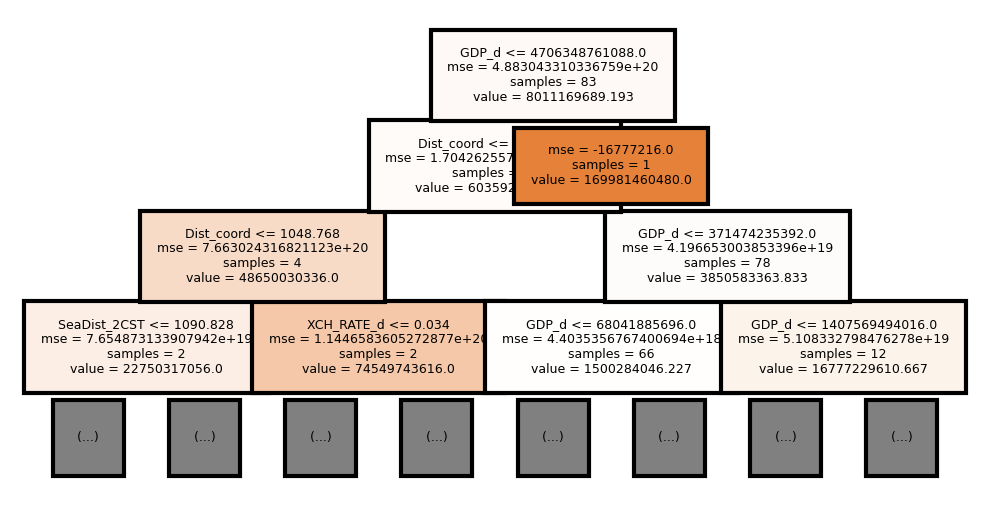

In [75]:
# using CART to do out-of-sample prediction
y = my_gravity_cs['FLOW'] 
X = my_gravity_cs[['GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

cart = tree.DecisionTreeRegressor(criterion='mse', min_samples_leaf = 1, min_impurity_decrease = 0, \
                                  min_samples_split=2, max_depth = None, random_state = 1)
cart = cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

print('Tree depth: %.0f' % cart.get_depth())
print('Out-of-sample Rsq: %.3f'% r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'% mean_squared_error(y_test, y_pred))


#dendrogram
matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (4, 2), 'figure.dpi': 300}) # set's parameters of the figure
tree.plot_tree(cart, max_depth = 3, filled = True, feature_names = list(X.columns),\
               fontsize = 3);

In [76]:
# finding out the optimal tree depth using cross validation

from sklearn.model_selection import cross_validate
import scipy as sp

def cv_iter(max_depth, max_leaf_nodes, min_samples_leafs, folds, X, y):
    kf = KFold(n_splits=folds, shuffle=True, random_state=1) 
    cart = tree.DecisionTreeRegressor(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes, min_samples_leaf = min_samples_leafs, random_state = 1) # settings for CART
    cv_result = cross_validate(cart, X, y, scoring = 'neg_mean_squared_error') 
    avg_score = np.mean(cv_result['test_score']) 
    return float(-avg_score)

8

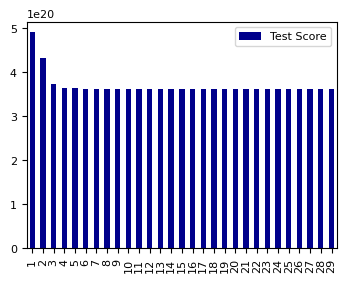

In [77]:
result = {}
for i in range(1, 30):
    result[i] = cv_iter(i, None, 2, 5, X_train, y_train) 

matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot.bar(color = 'DarkBlue')

results['Test Score'].idxmin()

Tree depth: 8
Out-of-sample Rsq: 0.640
Out-of-sample MSE: 7714374770623368192.000


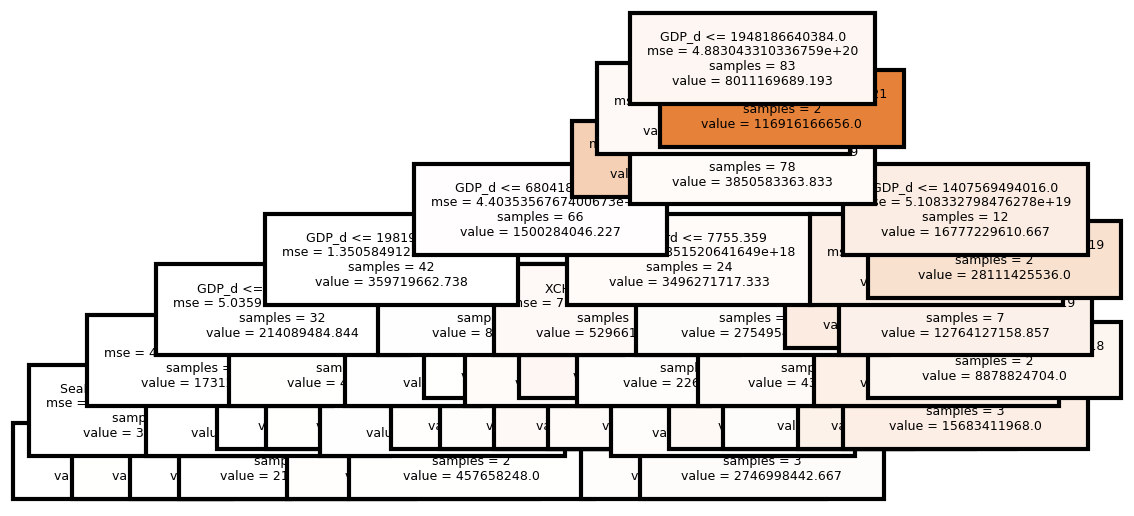

In [78]:
# using the optimal tree depth = 8

cart = tree.DecisionTreeRegressor(criterion='mse', min_samples_leaf = 2, min_impurity_decrease = 0, \
                                  min_samples_split=2, max_depth = 8, random_state = 1)
cart = cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)

print('Tree depth: %.0f' % cart.get_depth())
print('Out-of-sample Rsq: %.3f'% r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'% mean_squared_error(y_test, y_pred))


#dendrogram
matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (4, 2), 'figure.dpi': 300}) 
tree.plot_tree(cart, max_depth = 8, filled = True, feature_names = list(X.columns),\
               fontsize = 3);

In [79]:
# using random forest to do out-of-sample prediction

rf = ensemble.RandomForestRegressor(n_estimators = 100, min_samples_leaf = 2, oob_score = True, \
        random_state = 1)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Out-of-sample Rsq: %.3f'% r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'% mean_squared_error(y_test, y_pred))

Out-of-sample Rsq: 0.503
Out-of-sample MSE: 10651765341568411648.000


In [80]:
# finding out the optimal number of trees in the forest

def cv_iter(n, folds, X, y):
    kf = KFold(n_splits=folds, shuffle=True, random_state=1)
    rf = ensemble.RandomForestRegressor(n_estimators = n, min_samples_leaf = 1, \
        random_state = 1)
    cv_result = cross_validate(rf, X, y, scoring = 'neg_mean_squared_error')
    avg_score = np.mean(cv_result['test_score'])
    return float(-avg_score)

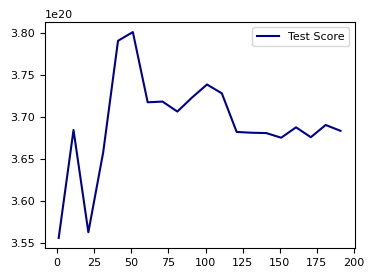

In [81]:
result = {}
for i in range(1, 200, 10):
    result[i] = cv_iter(i, 5, X_train, y_train)

matplotlib.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot(color = 'DarkBlue')

In [36]:
# we shouldn't use random forest (one single tree with optimal depth seems to be the optimal)
# provide intuition

In [82]:
# important features selected by rf

imp = pd.DataFrame(rf.feature_importances_, columns = ['Feature importance'])
imp['Feature'] = list(X.columns)
imp.sort_values(by=['Feature importance'], ascending=False).reset_index(drop = True)

,Feature importance,Feature
0,0.691174,GDP_d
1,0.092494,SeaDist_2CST
2,0.080487,Distw
3,0.070281,SeaDist_SHRT
4,0.042081,Dist_coord
5,0.008615,Contig
6,0.007013,Comlang
7,0.005684,XCH_RATE_d
8,0.001425,OECD_d
9,0.000741,EU_d


In [67]:
# using Lasso to do out-of-sample prediction

cols = ['FLOW', 'GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']
my_gravity_csl = my_gravity_cs[cols]

my_gravity_csl['c'] = 1

for j in ['GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']:
    for i in ['GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']:
        my_gravity_csl[f"{j[0:4]}_{i[0:4]}"] = my_gravity_csl[j]*my_gravity_csl[i]  
        
my_gravity_csl.head()

<ipython-input-67-5ccd7a72c667>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_gravity_csl['c'] = 1
<ipython-input-67-5ccd7a72c667>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_gravity_csl[f"{j[0:4]}_{i[0:4]}"] = my_gravity_csl[j]*my_gravity_csl[i]


,FLOW,GDP_o,GDP_d,XCH_RATE_o,XCH_RATE_d,Distw,Dist_coord,SeaDist_SHRT,SeaDist_2CST,Comlang,...,GATT_XCH_,GATT_Dist,GATT_SeaD,GATT_Coml,GATT_Cont,GATT_Curc,GATT_OECD,GATT_EU_o,GATT_EU_d,GATT_GATT
418230,9.313751e+07,1.760744e+12,4.919677e+09,0.065694,0.010003,4434.382121,4847.397488,9752.631836,9752.631836,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418298,6.820339e+08,1.760744e+12,3.021068e+10,0.065694,0.006515,11829.966780,12248.260647,17938.472656,17938.472656,0.0,...,0.006515,12248.260647,17938.472656,0.0,0.0,0.0,0.0,0.0,0.0,1.0
418550,2.545314e+09,1.760744e+12,1.645837e+11,0.065694,0.161337,19110.127665,19635.935418,21935.087891,21935.087891,0.0,...,0.161337,19635.935418,21935.087891,0.0,0.0,0.0,0.0,0.0,0.0,1.0
418721,1.344746e+10,1.760744e+12,4.263322e+11,0.065694,0.419114,8345.109613,7876.916907,8843.299805,8843.299805,0.0,...,0.419114,7876.916907,8843.299805,0.0,0.0,0.0,1.0,0.0,0.0,1.0
418947,2.011432e+09,1.760744e+12,1.931414e+11,0.065694,0.026537,7929.167484,8480.910822,16330.935547,16330.935547,0.0,...,0.026537,8480.910822,16330.935547,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [63]:
my_gravity_csl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 418230 to 432636
Columns: 141 entries, FLOW to GATT_GATT
dtypes: float32(16), float64(124), int64(1)
memory usage: 97.4 KB


In [68]:
# using Lasso to do out-of-sample predict

from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import Lasso

data = my_gravity_csl.copy()
X = data.iloc[:, 1:]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns) #for memory
y = data['FLOW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.005, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])

pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'% pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'% pipe.score(X_test, y_test))

In-sample Rsq:  0.9922
Out-of-sample Rsq: -0.6835


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.57929197509126e+20, tolerance: 4.052925947579512e+18
  model = cd_fast.enet_coordinate_descent(


In [59]:
pipe.named_steps['lasso'].coef_ 

array([ 0.00000000e+00,  1.49396695e+10,  0.00000000e+00,  2.82243845e+09,
       -4.47635710e+09,  3.62163303e+09,  4.36738515e+08, -1.39308120e+09,
        3.51775288e+09,  4.14926480e+09,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.34767256e+09,  0.00000000e+00, -2.95137385e+09,
        0.00000000e+00,  1.26212222e+09,  0.00000000e+00,  0.00000000e+00,
       -1.45679418e+09,  0.00000000e+00, -1.85529622e+09, -2.01961802e+08,
        3.66391309e+09,  1.60714392e+09, -1.36724152e+09,  1.80943504e+09,
        1.46806464e+09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.49201269e+09,  0.00000000e+00, -1.64110940e+09,  0.00000000e+00,
       -3.44120992e+08, -6.59583171e+08, -3.31163745e+10,  3.08773399e+10,
       -1.12797758e+10, -2.39008134e+10, -1.08880922e+09,  5.98023621e+09,
        4.75414985e+10,  4.74750232e+09, -1.47982204e+09,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.95551789e+09,  0.00000000e+00,
       -1.57324207e+10, -

In [69]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

,Lasso coefficient,Feature
0,0.000000e+00,GDP_o
1,8.955801e+09,GDP_d
2,0.000000e+00,XCH_RATE_o
3,-3.134217e+09,XCH_RATE_d
4,6.418627e+08,Distw
...,...,...
135,0.000000e+00,GATT_Curc
136,3.684961e+09,GATT_OECD
137,0.000000e+00,GATT_EU_o
138,-2.371792e+09,GATT_EU_d


In [70]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient,Feature
1,8.955801e+09,GDP_d
3,-3.134217e+09,XCH_RATE_d
4,6.418627e+08,Distw
5,-5.943678e+09,Dist_coord
6,1.081002e+09,SeaDist_SHRT
...,...,...
133,-4.246642e+08,GATT_Coml
134,2.607866e+07,GATT_Cont
136,3.684961e+09,GATT_OECD
138,-2.371792e+09,GATT_EU_d


In [84]:
# CART outperforms Lasso indicating that when predicting trade volumns nonlinearity plays a more important role.

In [86]:
pip install gme

  Created wheel for gme: filename=gme-1.2-py3-none-any.whl size=27290 sha256=9974f4a3a9118f6dab44a50440fa1e496c72e171f1e6445f4a8298ee00e02ba9
  Stored in directory: /Users/cici/Library/Caches/pip/wheels/5a/6c/aa/e580cbfbe3f98f05b09c4bfc385395f351bed40b3a100ce8a7
Successfully built gme
Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import numpy as np
import gme as gme

cols = ['FLOW', 'GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']
my_gravity_ppml = my_gravity_cs[cols]

In [190]:
# out-of-sample prediction using linear regression
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = my_gravity['FLOW']
X = my_gravity[['GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # in real application using as much training data as possible 80% or 90%

pipe1 = Pipeline([('scaler', StandardScaler()), 
                 ('regr', LinearRegression(fit_intercept = False, normalize=False, copy_X=False, n_jobs=-1))])


pipe1.fit(X_train, y_train)
print('In-sample Rsq: % .4f' % pipe1.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'% pipe1.score(X_test, y_test))
OLS_prediction = pipe1.score(X_test, y_test)

In-sample Rsq:  0.6674
Out-of-sample Rsq:  0.3168


In [181]:
# out-of-sample prediction using lasso regularisation
from sklearn.linear_model import Lasso
y = my_gravity['FLOW']
X = my_gravity[['GDP_o', 'GDP_d', 'XCH_RATE_o', 'XCH_RATE_d', 'Distw', 'Dist_coord', 'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol_o', 'Curcol_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d']]
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
pipe2 = Pipeline([('scaler', StandardScaler()),
                 ('lasso', Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
pipe2.fit(X_train, y_train)
print('In-sample Rsq: % .4f'% pipe2.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'% pipe2.score(X_test, y_test))
Lasso_prediction = pipe2.score(X_test, y_test)

In-sample Rsq:  0.6923
Out-of-sample Rsq:  0.3503


In [ ]:
# using lasso can improve out-of-sample fit, subjective selection can not be an issue as we have a large dataset